# Trabajo Final - Fundamentos de Data Science

## Bibliotecas

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report

## Carga de Datos

In [34]:
df = pd.read_csv("../Data/bike_buyers.csv")

## Inspección de Datos

In [35]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


#### Datos Null, Duplicados o Faltantes

In [37]:
df.isna().sum().sort_values()

ID                   0
Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
Home Owner           4
Income               6
Marital Status       7
Children             8
Age                  8
Cars                 9
Gender              11
dtype: int64

In [38]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

### Eliminación de Variables Innecesarias

In [39]:
#No utilizaremos la variable ID del cliente
df_index = df['ID']
df.drop(['ID'],axis=1,inplace=True)

In [40]:
df_index[0:3]
df.dtypes

Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [41]:
df.head(3)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No


<Axes: >

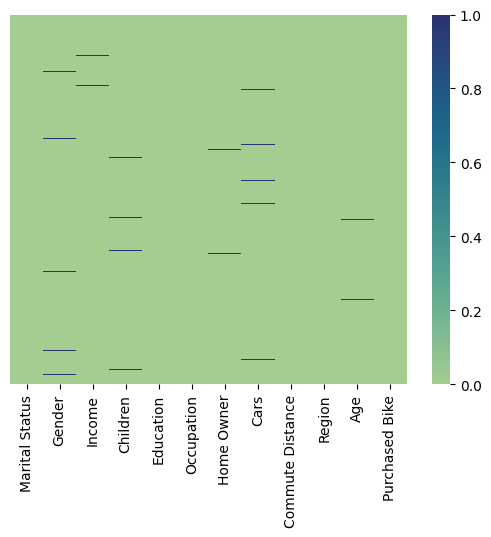

In [42]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')

## Limpieza de Datos

#### -Se hara uso de la metodologia de imputación simple para el pre-procesamiento de los datos

### variables numericas

In [43]:
numericas= df.select_dtypes(include=['float64', 'int'])

In [44]:
numericas.describe()

,Income,Children,Cars,Age
count,994.000000,992.000000,991.000000,992.000000
mean,56267.605634,1.910282,1.455096,44.181452
std,31067.817462,1.626910,1.121755,11.362007
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [45]:
for column in numericas.columns:
    df[column] = df[column].fillna(df[column].mean())
    df[column] = df[column].astype(int)
    
df.head(10)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,NaN,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
6,Single,Male,160000,2,High School,Management,NaN,4,0-1 Miles,Pacific,33,Yes
7,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
8,NaN,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
9,Married,Male,56267,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,44,Yes


### Variables Categoricas

In [46]:
categoricas = df.select_dtypes(include=['object','category'])

In [47]:
categoricas.describe()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
count,993,989,1000,1000,996,1000,1000,1000
unique,2,2,5,5,2,5,3,2
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America,No
freq,535,500,306,276,682,366,508,519


In [48]:
for column in categoricas:
    df[column] = df[column].fillna(df[column].mode()[0]) 

In [49]:
df['Commute Distance'] = df['Commute Distance'].replace({'0-1 Miles': 0,'1-2 Miles': 1, '10+ Miles': 10, '2-5 Miles': 2, '5-10 Miles': 5})

In [50]:
df.head(10)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0,Europe,36,Yes
5,Married,Female,10000,2,Partial College,Manual,Yes,0,1,Europe,50,No
6,Single,Male,160000,2,High School,Management,Yes,4,0,Pacific,33,Yes
7,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0,Europe,43,Yes
8,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5,Pacific,58,No
9,Married,Male,56267,2,Partial College,Manual,Yes,1,0,Europe,44,Yes


### Análisis de los Datos Post Limpieza

#### Datos Null, Duplicados o Faltantes

In [51]:
df.isnull().sum().sort_values()

Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [52]:
df.dtypes

Marital Status      object
Gender              object
Income               int32
Children             int32
Education           object
Occupation          object
Home Owner          object
Cars                 int32
Commute Distance     int64
Region              object
Age                  int32
Purchased Bike      object
dtype: object

In [53]:
df.head(10)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0,Europe,36,Yes
5,Married,Female,10000,2,Partial College,Manual,Yes,0,1,Europe,50,No
6,Single,Male,160000,2,High School,Management,Yes,4,0,Pacific,33,Yes
7,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0,Europe,43,Yes
8,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5,Pacific,58,No
9,Married,Male,56267,2,Partial College,Manual,Yes,1,0,Europe,44,Yes


<Axes: >

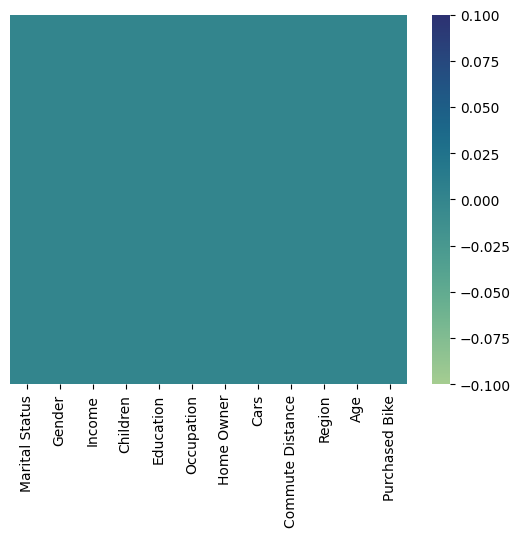

In [54]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')

## Creación del dataframe limpiado

In [55]:
ruta_archivo = r"C:\Users\USUARIO\Desktop\TrabjoFinal_AlonsoUlloa\Data\bike_buyers_clean.csv"
df.to_csv(ruta_archivo, index=False)

## Preguntas Resueltas

#### 1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

[Text(0.5, 1.0, 'Promedio de Ingresos según Compra de Bicicleta'),
 Text(0.5, 0, 'Bicicleta Comprada'),
 Text(0, 0.5, 'Promedio de Ingresos')]

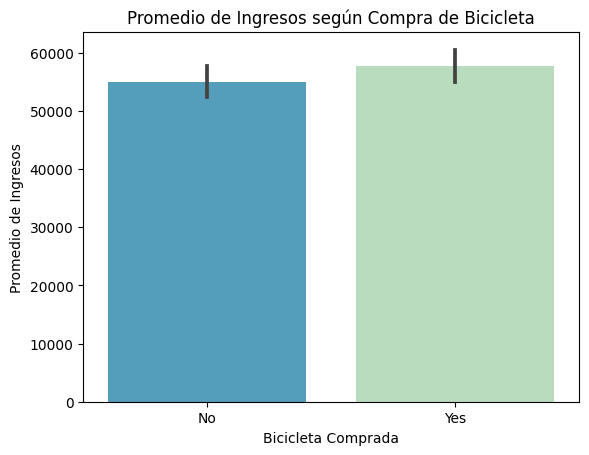

In [56]:
# Agrupar los datos por la variable 'Purchased Bike' y calcular el promedio de ingresos
sns.barplot(x='Purchased Bike', y='Income', data=df, palette='GnBu_r').set(title='Promedio de Ingresos según Compra de Bicicleta', xlabel='Bicicleta Comprada', ylabel='Promedio de Ingresos')

#### 2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

[Text(0.5, 1.0, 'Promedio de Ingresos según Estado Civil'),
 Text(0.5, 0, 'Estado Civil'),
 Text(0, 0.5, 'Promedio de Ingresos')]

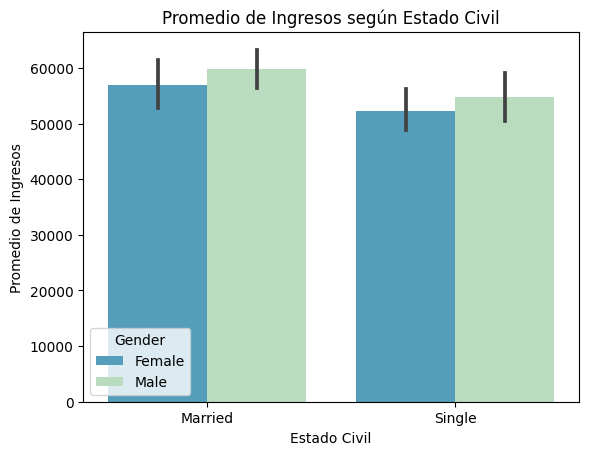

In [57]:
sns.barplot(x='Marital Status', y='Income', data=df, palette='GnBu_r', edgecolor=None, hue='Gender').set(title='Promedio de Ingresos según Estado Civil', xlabel='Estado Civil', ylabel='Promedio de Ingresos')


#### 3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

[Text(0.5, 1.0, 'Promedio de Hijos según Nivel Educativo'),
 Text(0.5, 0, 'Nivel Educativo'),
 Text(0, 0.5, 'Promedio de Hijos')]

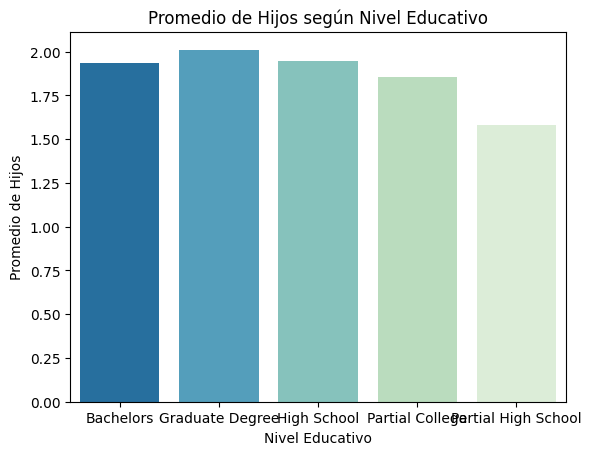

In [58]:
df['Con_hijos'] = np.where(df['Children'] > 0, 'Si', 'No')
mean_children = df.groupby('Education')['Children'].mean().reset_index()
sns.barplot(x='Education', y='Children', data=mean_children, palette='GnBu_r').set(title='Promedio de Hijos según Nivel Educativo', xlabel='Nivel Educativo', ylabel='Promedio de Hijos')

#### 4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

[Text(0.5, 1.0, 'Promedio de Vehículos según Ocupación'),
 Text(0.5, 0, 'Ocupación'),
 Text(0, 0.5, 'Promedio de Vehículos')]

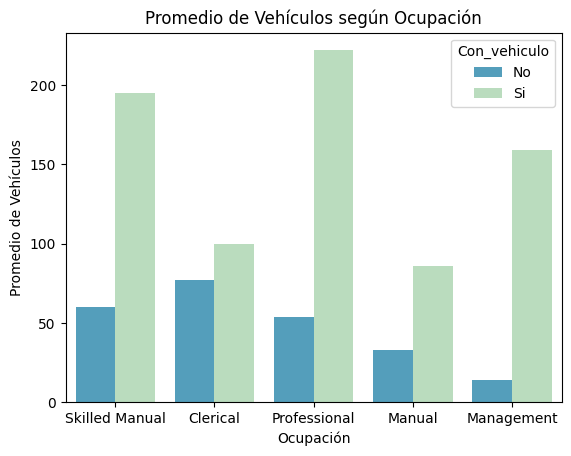

In [59]:
df['Con_vehiculo'] = np.where(df['Cars'] > 0, 'Si', 'No')
sns.countplot(x='Occupation', hue='Con_vehiculo', data=df, palette='GnBu_r').set(title='Promedio de Vehículos según Ocupación', xlabel='Ocupación', ylabel='Promedio de Vehículos')

#### 5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

[Text(0.5, 1.0, 'Promedio de Edad según Propietario de Vivienda'),
 Text(0.5, 0, 'Propietario de Vivienda'),
 Text(0, 0.5, 'Promedio de Edad')]

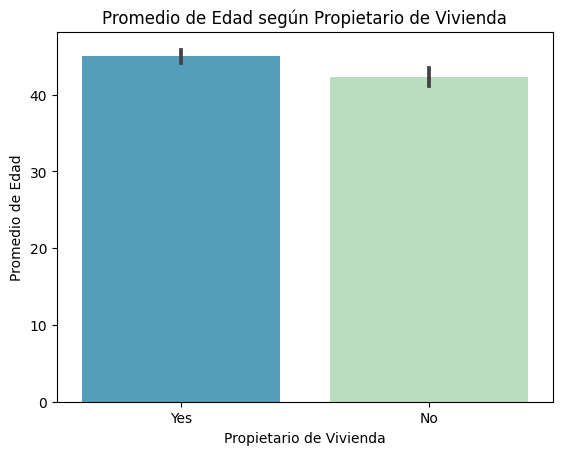

In [60]:
sns.barplot(x='Home Owner', y='Age', data=df, estimator=np.mean, palette='GnBu_r').set(title='Promedio de Edad según Propietario de Vivienda', xlabel='Propietario de Vivienda', ylabel='Promedio de Edad')

### Modelo de Regresión Lineal

Accuracy modelo Random Forest Classifier:  0.75
Precision modelo Random Forest Classifier:  0.7608695652173914
Reporte de modelo Random Forest Classifier:
              precision    recall  f1-score   support

          No       0.74      0.78      0.76        51
         Yes       0.76      0.71      0.74        49

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



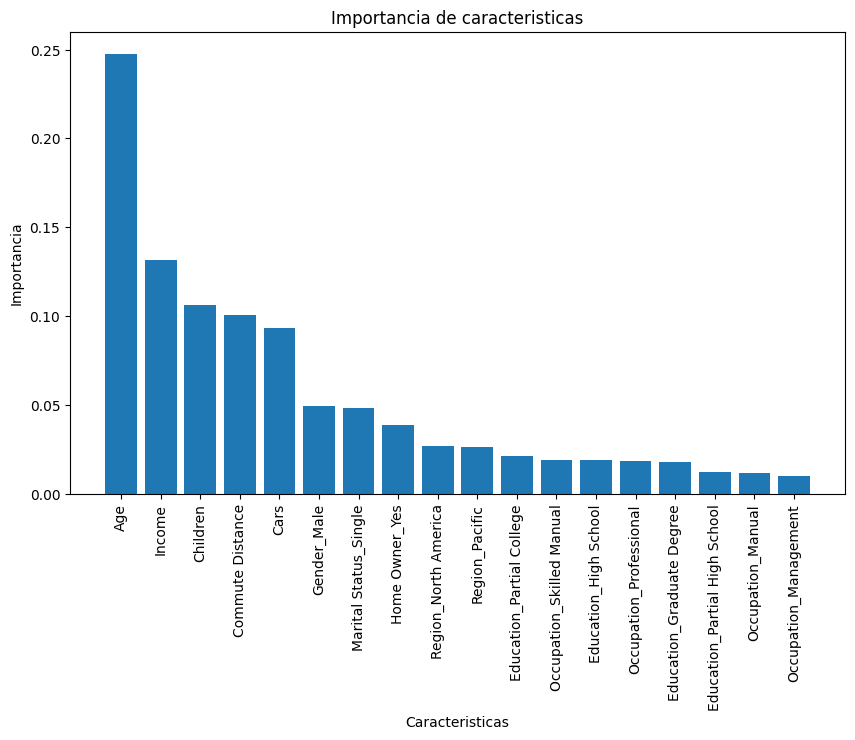

In [61]:
df = pd.read_csv('../Data/bike_buyers_clean.csv')


X = df[['Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation',
        'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']]
y = df['Purchased Bike']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=15)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Yes')
print("Accuracy modelo Random Forest Classifier: ", accuracy_rf)
print("Precision modelo Random Forest Classifier: ", precision_rf)

classification_report_rf = classification_report(y_test, y_pred_rf)
print("Reporte de modelo Random Forest Classifier:")
print(classification_report_rf)


features = X_train.columns
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Caracteristicas')
plt.ylabel('Importancia')
plt.title('Importancia de caracteristicas')
plt.xticks(rotation=90)
plt.show()




Accuracy modelo Regresion Logistica:  0.59
Precision modelo Regresion Logistica:  0.5833333333333334
Reporte de modelo Regresion Logistica:
              precision    recall  f1-score   support

          No       0.60      0.61      0.60        51
         Yes       0.58      0.57      0.58        49

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



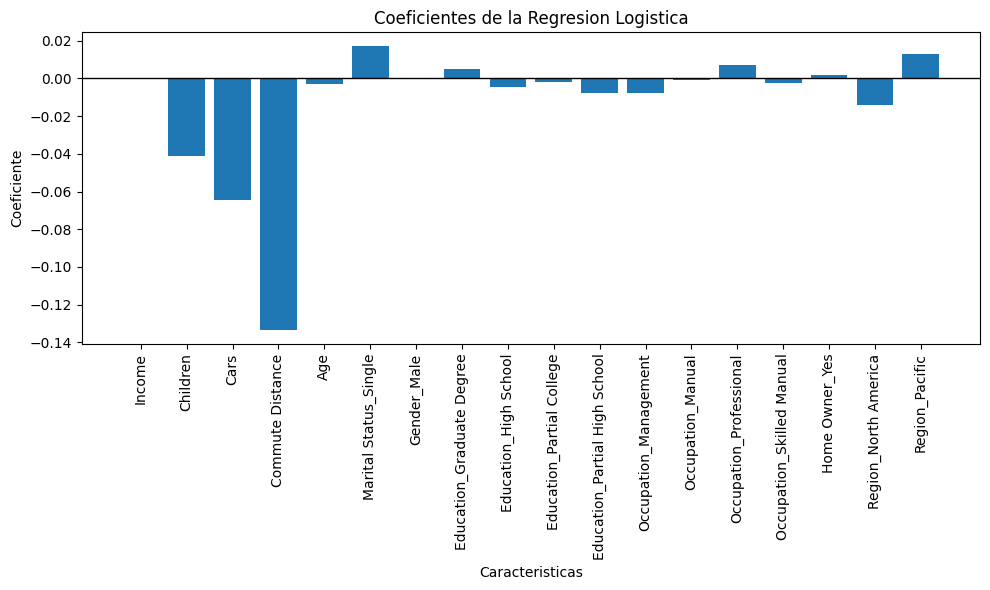

In [62]:
# Regresion Logistica
lr_model = LogisticRegression(random_state=15)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='Yes')
print("Accuracy modelo Regresion Logistica: ", accuracy_lr)
print("Precision modelo Regresion Logistica: ", precision_lr)

classification_report_lr = classification_report(y_test, y_pred_lr)
print("Reporte de modelo Regresion Logistica:")
print(classification_report_lr)

coefficients = lr_model.coef_[0]
feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(feature_names, coefficients)
ax.axhline(y=0, color='black', linewidth=1)


ax.set_xlabel('Caracteristicas')
ax.set_ylabel('Coeficiente')
ax.set_title('Coeficientes de la Regresion Logistica')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

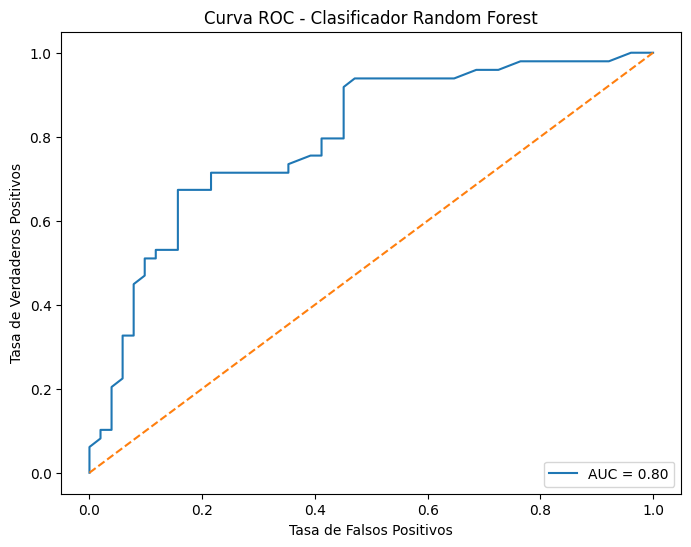

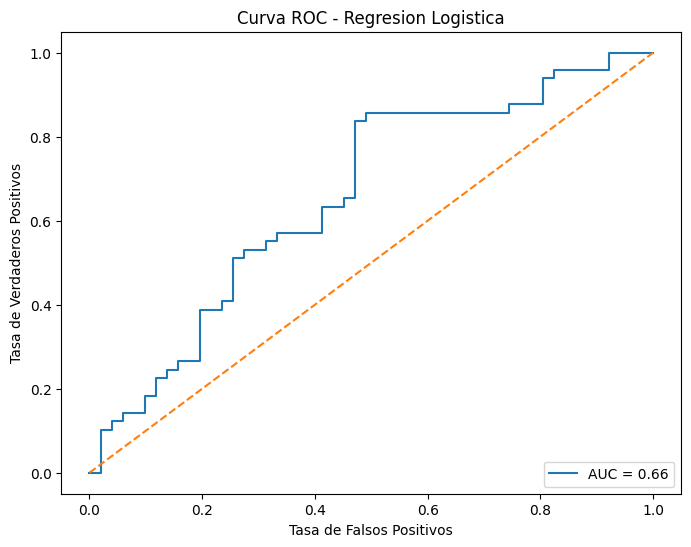

In [63]:
# Random Forest Classifier
class_mapping = {'No': 0, 'Yes': 1}
y_true_rf = np.array([class_mapping[label] for label in y_test])
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true_rf, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_true_rf, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clasificador Random Forest')
plt.legend(loc='lower right')
plt.show()

print("\n")

# Regresion Logistica
y_true_lr = np.array([class_mapping[label] for label in y_test])
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true_lr, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_true_lr, y_pred_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='AUC = %0.2f' % roc_auc_lr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresion Logistica')
plt.legend(loc='lower right')
plt.show()

In [64]:
valores_predicciones = pd.DataFrame({
    'Marital Status': ['Married','Married','Married','Single','Single'],
    'Gender': ['Female','Male','Male','Male','Male'],
    'Income': [40000,30000,80000,70000,30000],
    'Children': [1,3,5,0,0],
    'Education': ['Bachelors','Partial College','Partial College','Bachelors','Bachelors'],
    'Occupation': ['Skilled Manual','Clerical','Professional','Professional','Clerical'],
    'Home Owner': ['Yes','Yes','No','Yes','No'],
    'Cars': [0,1,2,1,0],
    'Commute Distance': [0,0,2,5,0],
    'Region': ['Europe','Europe','Europe','Pacific','Europe'],
    'Age': [42,43,60,41,36]
})

valores_predicciones = pd.get_dummies(valores_predicciones, drop_first=True)

missing_columns = set(X_train.columns) - set(valores_predicciones.columns)
extra_columns = set(valores_predicciones.columns) - set(X_train.columns)

for column in missing_columns:
    valores_predicciones[column] = 0

valores_predicciones = valores_predicciones[X_train.columns]

predictions_rf = rf_model.predict(valores_predicciones)
predictions_lr = lr_model.predict(valores_predicciones)

print("Predicciones Random Forest Classifier:")
print(predictions_rf)

print("Predicciones Regresion Logistica:")
print(predictions_lr)

Predicciones Random Forest Classifier:
['No' 'No' 'No' 'Yes' 'Yes']
Predicciones Regresion Logistica:
['Yes' 'No' 'No' 'No' 'Yes']
